In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
# get CVAPs for each precinct
CD = "CD"
SD = "sldu172"
HD = "sldl358"
cvap_df = pd.read_csv("TX_cvap_for_EI.csv")
cvap_cols = list(filter(lambda x:'CVAP_2012' in x, cvap_df.columns))
cvap_cols += ["X12G_President_CVAP", CD, SD, HD]
cvap_df = cvap_df[cvap_cols]

# formatting functions...
def change_col_name(string):
    if '_counts' in string:
        string = string.replace('_counts', '')
    if 'abstain' in string:
        string = string.replace('abstain_', 'X')
        string += "_abstain"
    return string
def format_df(df):
    winnowed_cols = list(filter(lambda x:'12G_President' in x, prec_counts1.columns))
    old_winnowed_cols = winnowed_cols
    winnowed_cols = list(map(change_col_name, winnowed_cols))
    winnowed_cols
    changeColsDict = dict(zip(old_winnowed_cols, winnowed_cols))
    df = df.rename(columns=changeColsDict)
    df = df[changeColsDict.values()]
    for level in [CD, SD, HD]:
        df[level] = cvap_df[level]
    return df

# comparison function
def compare(df1, df2):
    cols1 = df1.columns
    cols2 = df2.columns
    print(f'first df has {len(cols1)} columns') # how do I do the cooler thing...
    print(f'second df has {len(cols2)} columns')
    
    cols = []
    for col in cols1:
        if col in cols2:
            cols.append(col)
    print(f'Comparing on {len(cols)} columns')
    
    zeros = np.zeros(shape=(len(df1), len(cols)))
    compare_df_props = pd.DataFrame(zeros, columns=cols)
#     compare_df_counts = compare_df_props
    zeroBuffer = 0
    for i in range(len(df1)):
        i += 1 # groupby makes for 1-indexed
        for col in cols:
            diff = abs(df1[col][i] - df2[col][i]) 
            CVAP_TOT = col.split(".")[0]
            CVAP_CAT_TOT = cvap_df.groupby(by=[HD]).sum()[CVAP_TOT][i]
            if CVAP_CAT_TOT != 0:
                pct_diff = diff / CVAP_CAT_TOT
            else:
                zeroBuffer += 1
                pct_diff = 0
#             compare_df_counts[col][i-1] = diff
            compare_df_props[col][i-1] = pct_diff # off by one..
    print(f'There were {zeroBuffer} instances of the buffer column = 0, set pct_diff=0 in each case')
    return compare_df_props

In [148]:
# load in two EI counts files to compare
prec_counts1_path = "gabe_EI_1.csv"
prec_counts2_path = "gabe_EI_2.csv"
prec_counts3_path = "Amy_EI_1.csv"
prec_counts1 = pd.read_csv(prec_counts1_path)
# prec_counts1 = format_df(prec_counts1)
prec_counts2 = pd.read_csv(prec_counts2_path)
prec_counts3 = pd.read_csv(prec_counts3_path)

# make dfs (grouped by some districting level) to compare
df1 = prec_counts1.groupby(by=[HD]).sum()
df2 = prec_counts2.groupby(by=[HD]).sum()
df3 = prec_counts3.groupby(by=[HD]).sum()

In [149]:
df1v2 = compare(df1, df2)
df1v3 = compare(df1, df3)
df2v3 = compare(df2, df3)

df1 has 17 columns
df2 has 17 columns
Comparing on 17 columns
There were 213 instances of the buffer column = 0, set pct_diff=0 in each case
df1 has 17 columns
df2 has 17 columns
Comparing on 17 columns
There were 213 instances of the buffer column = 0, set pct_diff=0 in each case
df1 has 17 columns
df2 has 17 columns
Comparing on 17 columns
There were 213 instances of the buffer column = 0, set pct_diff=0 in each case


In [150]:
props1v2 = df1v2.values.flatten()
props1v3 = df1v3.values.flatten()
props2v3 = df2v3.values.flatten()

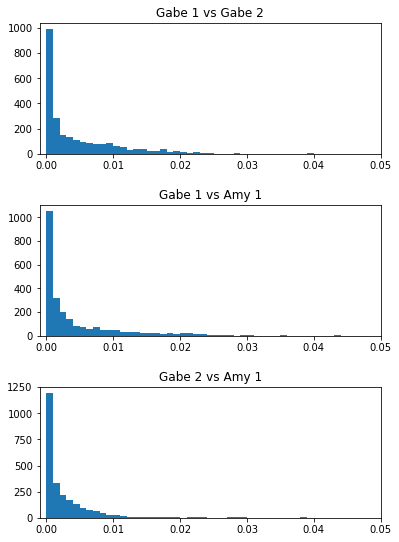

In [190]:
# plt.title("Distribution of differences between gabe_1v2, normalized by CVAP")
fig, ax = plt.subplots(3,1, figsize=(6,8))
fig.tight_layout(pad=3.0)
data = [props1v2, props1v3, props2v3]
titles = ['Gabe 1 vs Gabe 2','Gabe 1 vs Amy 1','Gabe 2 vs Amy 1']
for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_xlim(-0.001, 0.05)
    ax[i].hist(data[i], bins=np.arange(0,0.06, 0.001))

plt.show()

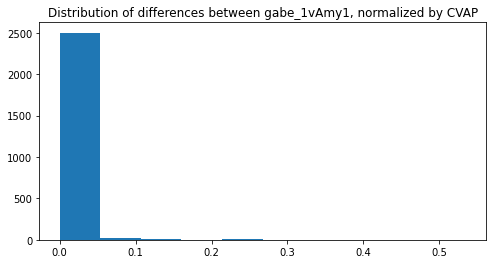

In [152]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Distribution of differences between gabe_1vAmy1, normalized by CVAP")
ax.hist(props1v3)
ax.set_xlim(-0.015, 0.32)
plt.show()

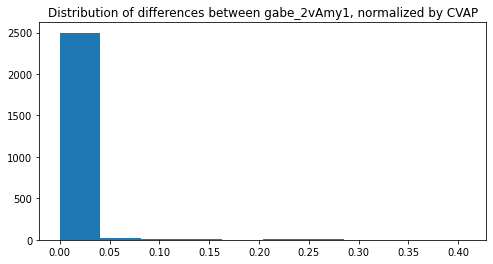

In [153]:
fig, ax = plt.subplots(figsize=(8,4))
ax.set_title("Distribution of differences between gabe_2vAmy1, normalized by CVAP")
ax.hist(props2v3)
# ax.set_xlim(-0.015, 0.32)
plt.show()